## TSF Task-1 Prediction using Supervised ML
## Author: Jalees Ahmad

### Importing all the required Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading the Dataset

In [2]:
#Loading the dataset in student_data
student_data=pd.read_csv('marks.txt')
student_data.head() #Print first 5 rows of the data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Overview of dataset

In [3]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### From above we can interpret that dataset contains 2 column Hours and Scores
#### Where data type of Hours is float and Scores is Int

### Checking Null Values

In [4]:
student_data.isna().sum()

Hours     0
Scores    0
dtype: int64

### Description of the dataset 

In [5]:
student_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


#### From above describe function we get to know that there are total 25 rows, mean of Hour column is 5.012 and mean of Scores column is 51.48. Describe function also provide other information such as min and max values of column, standard deviation etc.


### Histogram to show data distribution

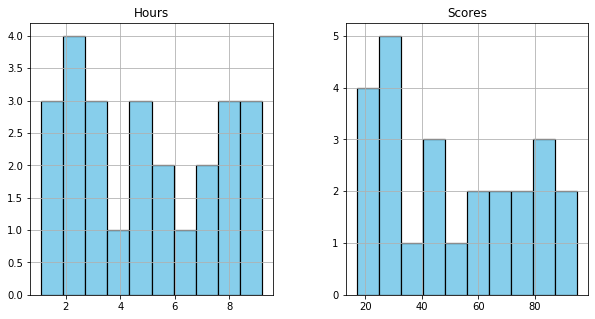

In [6]:
student_data.hist(edgecolor='black',linewidth=1.2,color='Skyblue')
fig=plt.gcf()
fig.set_size_inches(10,5)

### Plotting a scatter plot to find the relation between hour and marks column

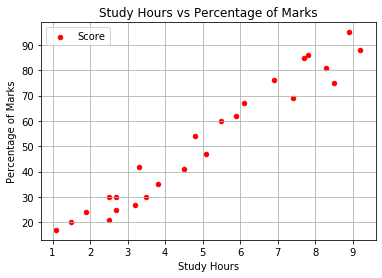

In [7]:
student_data.plot('Hours','Scores','scatter',grid=True,label='Score',color='red')
plt.title('Study Hours vs Percentage of Marks')
plt.xlabel('Study Hours')
plt.ylabel('Percentage of Marks')
plt.show()

### Declaring the Inputs and Targets

In [8]:
X=student_data.iloc[:,:-1].values
Y=student_data.iloc[:,1].values

### Splitting the data into traning and test set in ratio 80:20

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,random_state=0)

### Building a Linear Regression model 

In [10]:
from sklearn.linear_model import LinearRegression
regression_model=LinearRegression()
regression_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Intercept and Coefficient of the above Regression Model

In [11]:
print("Intercept: ",regression_model.intercept_,"  Coefficient: ",regression_model.coef_)

Intercept:  2.018160041434683   Coefficient:  [9.91065648]


In [12]:
#Traing score
regression_model.score(X_train,Y_train)

0.9515510725211553

In [13]:
#Test score
regression_model.score(X_test,Y_test)

0.9454906892105356

### Plotting the Regression line

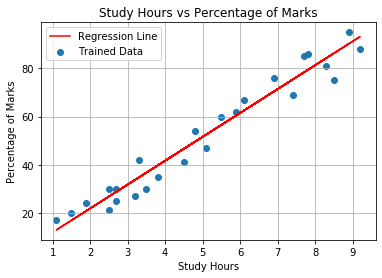

In [14]:
line = regression_model.coef_*X+regression_model.intercept_
plt.scatter(X, Y,label='Trained Data')
plt.plot(X, line,color='Red',label='Regression Line')
plt.title('Study Hours vs Percentage of Marks')
plt.xlabel('Study Hours')
plt.ylabel('Percentage of Marks')
plt.grid(True)
plt.legend()
plt.show()

In [15]:
print(X_test) #To print hour of test dataset

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [16]:
#Manually predictaing the test values
manual_pred=regression_model.intercept_ + regression_model.coef_ * X_test
manual_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [17]:
#Predicting the test value using Sckit-Learn 
y_pred=regression_model.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

### DataFrame to show different between actual and predicted data

In [18]:
df_actual_pred=pd.DataFrame({'Actual':Y_test,'Predicted':y_pred,'Deviation':Y_test-y_pred})
df_actual_pred

,Actual,Predicted,Deviation
0,20,16.884145,3.115855
1,27,33.732261,-6.732261
2,69,75.357018,-6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


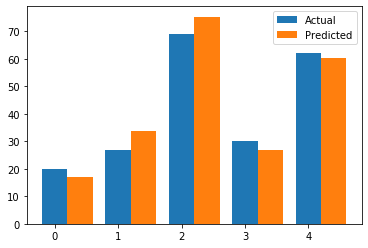

In [19]:
plt.bar(np.arange(5),df_actual_pred['Actual'],width=.4,label='Actual')
plt.bar(np.arange(5)+.4,df_actual_pred['Predicted'],width=.4,label='Predicted')
plt.legend()
plt.show()

### Predicting score if a student studies for 9.25 hrs/ day

In [20]:
pred=regression_model.predict([[9.25]])
pred

array([93.69173249])

### DataFrame to show study hour and score

In [21]:
df=pd.DataFrame({'Study Hour':9.25,'Score':pred})
df

,Study Hour,Score
0,9.25,93.691732


### From above data frame we can see that if a student study for 9.25 hour than the score will be 93.691732 

### Evaluating the performance of the model using mean square error

In [22]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


### END